In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly
from plotly import graph_objects as go
import seaborn as sns

In [2]:
experiment_data = "inference_times"
experiment_name = "times_2h-runs"
experiment_id = ""
best_test_id = ""
experiment_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

create_dir = True

In [3]:
def create_directory(
    directory_path
    ):
    """
    Muller-Cleve, Simon F.; Istituto Italiano di Tecnologia - IIT; Event-driven perception in robotics - EDPR; Genova, Italy.
    """
    if os.path.exists(directory_path):
        return None
    else:
        try:
            os.makedirs(directory_path)
        except:
            # in case another machine created the path meanwhile! :(
            return None
        return directory_path

In [4]:
if create_dir:
    path_for_plots = "./plots/{}/{}".format(experiment_data,experiment_name)
    create_directory(path_for_plots)

In [5]:
with open("./times_2h-runs.txt", 'r') as f:
    inference_times = np.array([float(el.strip())*1000 for num,el in enumerate(f) if num>=5])

In [6]:
# Statistics
mean_time = np.mean(inference_times)
median_time = np.median(inference_times)
stddev_time = np.std(inference_times)

print("Mean: {} ms".format(np.round(mean_time,2)))
print("Median: {} ms".format(np.round(median_time,2)))

print("Std. Dev.: {} ms".format(np.round(stddev_time,2)))

Mean: 234.81 ms
Median: 231.13 ms
Std. Dev.: 9.25 ms


In [7]:
axis_label_size = 12
axis_ticks_size = 10
#cbar_label_size = 16
#cbar_ticks_size = 14
#legend_title_size = 'x-large'
legend_entry_size = 8

### Continuous execution

Numero di colori: 256


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


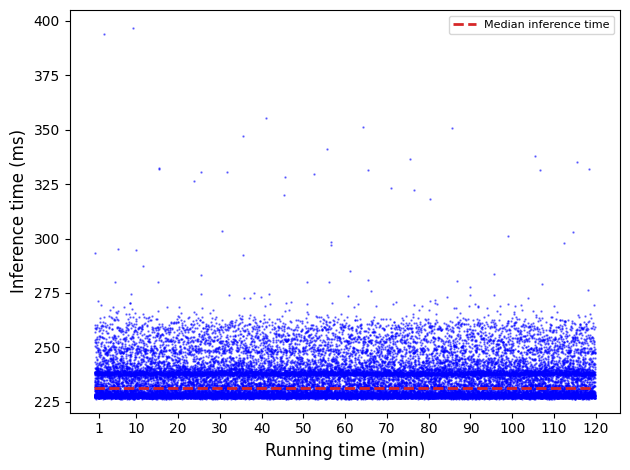

In [94]:
save_fig = False

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

#cmap = plt.get_cmap('turbo')
#print("Numero di colori: {}".format(len(cmap.colors)))

exec_time = np.cumsum(inference_times)/1000/60 #range(len(inference_times))

plt.figure()
plt.scatter(exec_time,inference_times, s=0.5, alpha=0.5, color="blue")
plt.plot(exec_time,median_time*np.ones(len(exec_time)),label="Median inference time",color="tab:red",linestyle="dashed",linewidth=2)
plt.ylim((220,405))
plt.xlabel("Running time (min)", fontsize=axis_label_size)
plt.ylabel("Inference time (ms)", fontsize=axis_label_size)
plt.xticks(np.array([1]+list(np.arange(10,120+1,10))))
plt.yticks(np.arange(225,400+1,25),fontsize=axis_ticks_size)
plt.legend(fontsize=legend_entry_size)
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/continuous_execution_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/continuous_execution_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/continuous_execution_{}.eps".format(NOW), dpi=300)
plt.show()

### Distribution

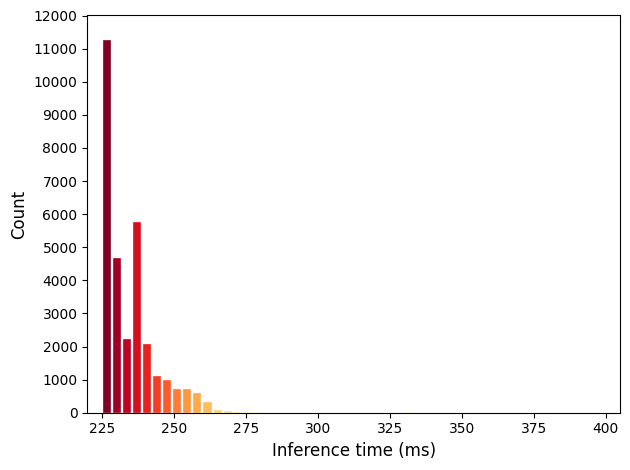

In [10]:
save_fig = True

NOW = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

cmap = plt.get_cmap('YlOrRd_r')
#print("Numero di colori: {}".format(len(cmap.colors)))

plt.figure()
_, bins, patches = plt.hist(inference_times, bins=50, range=(225,400), linewidth=0.25, edgecolor="white", rwidth=0.8, log=False)
for i, rect in enumerate(patches):
    rect.set_fc(cmap(i*17))
plt.xlim((220,405))
plt.xticks(np.arange(225,400+1,25),fontsize=axis_ticks_size)
plt.ylim((0,12000))
plt.yticks(np.arange(0,12000+1,1000),fontsize=axis_ticks_size)
plt.xlabel("Inference time (ms)", fontsize=axis_label_size)
plt.ylabel("Count", fontsize=axis_label_size)
plt.tight_layout()
if save_fig:
    plt.savefig(path_for_plots + "/distribution_{}.pdf".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/distribution_{}.png".format(NOW), dpi=300)
    plt.savefig(path_for_plots + "/distribution_{}.eps".format(NOW), dpi=300)
plt.show()

time_values = np.linspace(min(bins),max(bins),patches.datavalues.shape[0])
counts = patches.datavalues

df = pd.DataFrame()
df["time_values"] = time_values
df["counts"] = counts

In [14]:
# fig = go.Figure(go.Histogram2d(
#         x=df.time_values,
#         y=df.counts,
#         autobinx=False,
#         xbins=dict(start=225, end=400, size=3.5),
#         autobiny=False,
#         ybins=dict(start=0, end=12000, size=100),
#         #texttemplate= "%{z}"
#     ))
# 
# fig.write_image("./plots/fig1.png")
# #fig.show()